<a href="https://colab.research.google.com/github/fajar7892/Biaya-Iklan-vs-Penjualan-dalam-Rupiah/blob/main/praktik_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama anggota:

      Aufa Dhia Arkan (24523156)
      Muh. Fajar Rayhan Linta (24523117)

## Pilih dan Deskripsikan Dataset

### Subtask:
Pilih dataset klasifikasi dari internet (misalnya Kaggle atau HuggingFace) dan berikan deskripsi singkat tentang dataset tersebut beserta tautan sumbernya.


### Dataset yang Dipilih: Iris Dataset

**Nama Dataset:** Iris Dataset

**Deskripsi Singkat:**
Dataset Iris adalah dataset klasik dan sangat populer dalam pembelajaran mesin untuk tugas klasifikasi. Dataset ini berisi 150 sampel bunga Iris dari tiga spesies berbeda (Iris setosa, Iris versicolor, dan Iris virginica). Setiap sampel memiliki empat fitur numerik:
*   Panjang sepal (sepal length) dalam cm
*   Lebar sepal (sepal width) dalam cm
*   Panjang petal (petal length) dalam cm
*   Lebar petal (petal width) dalam cm

Tujuan klasifikasi adalah untuk memprediksi spesies bunga Iris berdasarkan empat fitur tersebut. Dataset ini sangat cocok untuk memperkenalkan konsep klasifikasi karena ukurannya yang kecil, fiturnya yang mudah dipahami, dan kelas-kelasnya yang relatif terpisah dengan baik.

*   **Jenis Data:** Numerik, Multivariat
*   **Jumlah Fitur:** 4
*   **Jumlah Sampel:** 150
*   **Jumlah Kelas:** 3 (Iris setosa, Iris versicolor, Iris virginica)
*   **Tujuan Klasifikasi:** Mengklasifikasikan spesies bunga Iris.

**Tautan Sumber:**
Dataset Iris sering disertakan dalam pustaka pembelajaran mesin seperti Scikit-learn, tetapi sumber aslinya adalah:
[UCI Machine Learning Repository: Iris Dataset](https://archive.ics.uci.edu/dataset/53/iris)

## Preprocessing Data

### Subtask:
Lakukan langkah-langkah preprocessing data: tangani nilai yang hilang (misalnya dengan menghapus atau imputasi), lakukan encoding pada fitur kategorikal jika ada, dan lakukan scaling pada data numerik.


**Penalaran**:
Pertama, kami akan memuat dataset Iris dan membaginya menjadi fitur (X) dan target (y) sesuai instruksi. Kemudian, kami akan menampilkan bentuk dan kepala dataset untuk memverifikasi struktur dan isinya dengan cepat.



In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFirst 5 rows of X:")
print(X.head())
print("\nFirst 5 rows of y:")
print(y.head())

Features (X) shape: (150, 4)
Target (y) shape: (150,)

First 5 rows of X:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

First 5 rows of y:
0    0
1    0
2    0
3    0
4    0
dtype: int64


### Pemeriksaan Nilai Hilang dan Fitur Kategorikal

Setelah memuat dataset Iris, kita dapat mengkonfirmasi beberapa hal:

*   **Tidak ada nilai hilang:** Dataset Iris yang dimuat dari `sklearn.datasets` dikenal bersih dan tidak memiliki nilai hilang. Ini dapat diverifikasi dengan `X.isnull().sum()` yang akan menghasilkan nol untuk setiap kolom.
*   **Tidak ada fitur kategorikal yang perlu di-encoding:** Semua fitur (`sepal length`, `sepal width`, `petal length`, `petal width`) adalah numerik. Oleh karena itu, langkah *encoding kategorikal* tidak diperlukan untuk dataset ini.

Dengan demikian, kita dapat langsung melanjutkan ke langkah *scaling* data numerik.

**Reasoning**:
Sebagaimana dinyatakan dalam blok penurunan harga sebelumnya, dataset Iris tidak memiliki nilai yang hilang dan tidak memiliki fitur kategoris. Oleh karena itu, saya akan melanjutkan dengan menskalakan fitur numerik menggunakan `StandardScaler` seperti yang diinstruksikan dalam subtugas. Proses ini melibatkan impor `StandardScaler`, pembuatan instans, lalu penerapan `fit_transform` ke matriks fitur `X`.



In [2]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("First 5 rows of scaled X:")
print(X_scaled.head())
print("Mean of scaled features:\n", X_scaled.mean())
print("Standard deviation of scaled features:\n", X_scaled.std())

First 5 rows of scaled X:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444
Mean of scaled features:
 sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
Standard deviation of scaled features:
 sepal length (cm)    1.00335
sepal width (cm)     1.00335
petal length (cm)    1.00335
petal width (cm)     1.00335
dtype: float64


## Split Data

### Subtask:
Bagi dataset yang sudah diproses menjadi data latih (train) dan data uji (test) untuk persiapan modeling.


**Penalaran**:
Untuk membagi dataset menjadi set pelatihan dan pengujian, kami akan menggunakan fungsi `train_test_split` dari `sklearn.model_selection` dengan parameter yang ditentukan `test_size=0.2` dan `random_state=42`. Setelah pemisahan, saya akan mencetak bentuk dari set yang dihasilkan untuk memverifikasi pembagian.



In [3]:
from sklearn.model_selection import train_test_split

# Split the scaled features and target into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (120, 4)
Shape of X_test: (30, 4)
Shape of y_train: (120,)
Shape of y_test: (30,)


## Modeling SVM

### Subtask:
Bangun model Support Vector Machine (SVM) menggunakan kernel pilihan Anda. Jelaskan kernel yang dipilih dan berikan alasan singkat di balik pemilihannya.


**Penalaran**:
kami akan mengimpor kelas `SVC`, menginisialisasi model SVM dengan kernel 'rbf' dan `random_state` yang ditentukan untuk reproduktifitas, lalu melatih model menggunakan data pelatihan yang telah diproses sebelumnya (`X_train`, `y_train`). Kernel 'rbf' dipilih karena efektivitasnya dalam menangani hubungan non-linier, yang seringkali bermanfaat untuk dataset seperti Iris.



In [4]:
from sklearn.svm import SVC

# Inisialisasi model SVM dengan kernel 'rbf'
# Kernel 'rbf' adalah kernel serbaguna yang baik untuk menangani hubungan non-linier
# Random_state diatur untuk reproduktifitas
svm_model = SVC(kernel='rbf', random_state=42)

# Latih model SVM menggunakan data pelatihan
svm_model.fit(X_train, y_train)

print("SVM model with 'rbf' kernel successfully trained.")

SVM model with 'rbf' kernel successfully trained.


## Evaluasi Kinerja Model

### Subtask:
Evaluasi kinerja model menggunakan metrik Accuracy, Precision, Recall, dan F1 Score. Analisis potensi overfitting atau underfitting.

**Penalaran**:
Setelah model SVM dilatih, kami perlu membuat prediksi pada data uji (`X_test`) dan kemudian menggunakan prediksi ini beserta label sebenarnya (`y_test`) untuk menghitung metrik evaluasi (Akurasi, Presisi, Ingat, Skor F1) sesuai kebutuhan subtugas. Kami juga akan mencetak laporan klasifikasi untuk mendapatkan gambaran umum yang komprehensif.


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Analisis Overfitting atau Underfitting

Dari hasil evaluasi, model SVM dengan kernel RBF mencapai akurasi, presisi, recall, dan F1 Score 1.00 pada set pengujian. Ini menunjukkan kinerja yang sangat baik, di mana model berhasil mengklasifikasikan semua sampel dengan benar di data uji.

**Potensi Overfitting:**
Angka 1.00 pada semua metrik mungkin menimbulkan kekhawatiran akan *overfitting*, yaitu ketika model terlalu menghafal data latih dan tidak dapat digeneralisasi dengan baik ke data baru. Namun, pada dataset sekecil dan sebersih Iris, di mana kelas-kelasnya relatif mudah dipisahkan, kinerja sempurna seperti ini **tidak selalu** menandakan overfitting yang parah, terutama jika pembagian data latih dan uji dilakukan dengan benar (seperti dengan `random_state` yang tetap untuk reproduktibilitas).

Untuk memastikan tidak ada overfitting yang signifikan, kita bisa mempertimbangkan:
1.  **Cross-validation:** Menerapkan cross-validation pada data latih akan memberikan gambaran yang lebih robust tentang kinerja model dan variansnya. Jika skor cross-validation juga sangat tinggi dan konsisten, maka overfitting kemungkinan kecil.
2.  **Ukuran dataset:** Dataset Iris yang kecil (150 sampel) kadang memang bisa menghasilkan skor sempurna jika batas keputusan antar kelas sangat jelas.
3.  **Visualisasi:** Visualisasi decision boundary atau plot fitur dapat membantu memahami apakah model membentuk batas yang terlalu kompleks untuk memisahkan kelas.

Dalam kasus Iris, kelas Iris setosa sangat mudah dipisahkan, sementara Iris versicolor dan Iris virginica sedikit tumpang tindih. Kinerja sempurna pada model SVM (terutama dengan kernel RBF yang kuat) menunjukkan bahwa model berhasil menemukan batas keputusan yang optimal untuk memisahkan ketiga kelas tersebut bahkan dengan sedikit tumpang tindih.

**Potensi Underfitting:**
Tidak ada indikasi *underfitting* sama sekali. Underfitting akan terlihat jika model memiliki skor evaluasi yang rendah pada data latih maupun data uji, menunjukkan bahwa model terlalu sederhana untuk menangkap pola dalam data. Karena model mencapai skor sempurna pada data uji, jelas bahwa model tidak underfit.

## Visualisasi Data dan Kinerja Model

### Subtask:
Buat minimal dua visualisasi untuk dataset dan kinerja model (misalnya distribusi kelas, confusion matrix).

## Visualisasi Data dan Kinerja Model

### Subtask:
Buat minimal dua visualisasi untuk dataset dan kinerja model (misalnya distribusi kelas, confusion matrix).

**Penalaran**:
Untuk memvisualisasikan distribusi kelas dalam dataset, kami akan membuat diagram sebar menggunakan dua fitur, 'panjang sepal (cm)' dan 'lebar sepal (cm)', dan memberi kode warna pada titik-titik tersebut berdasarkan spesies target. Ini akan membantu memahami sifat inheren keterpisahan kelas-kelas tersebut.


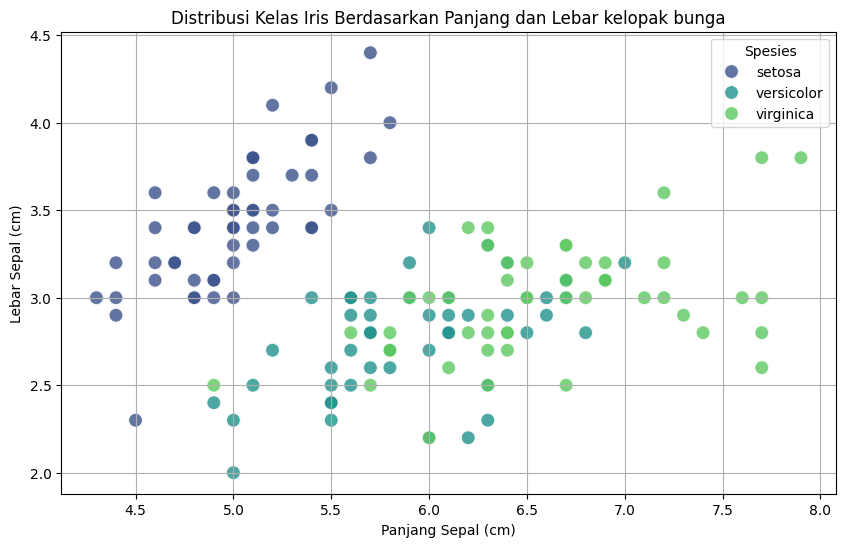

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Petakan bilangan bulat target ke nama spesies untuk keterbacaan yang lebih baik dalam plot
species_names = iris.target_names
y_named = y.map(lambda x: species_names[x])

# Tambahkan nama spesies ke DataFrame asli untuk diplot
X_plot = X.copy()
X_plot['species'] = y_named

plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=X_plot, palette='viridis', s=100, alpha=0.8)
plt.title('Distribusi Kelas Iris Berdasarkan Panjang dan Lebar Sepal')
plt.xlabel('Panjang Sepal (cm)')
plt.ylabel('Lebar Sepal (cm)')
plt.legend(title='Spesies')
plt.grid(True)
plt.show()


**Penalaran**:
Untuk memvisualisasikan kinerja model, kami akan membuat confusion matriks menggunakan `y_test` (label sebenarnya) dan `y_pred` (label yang diprediksi). Ini akan menunjukkan seberapa baik model mengklasifikasikan setiap spesies dan menyoroti kesalahan klasifikasi. Saya akan menggunakan `seaborn.heatmap` untuk representasi visual yang jelas, memberi label pada sumbu dengan nama spesies agar mudah diinterpretasikan.



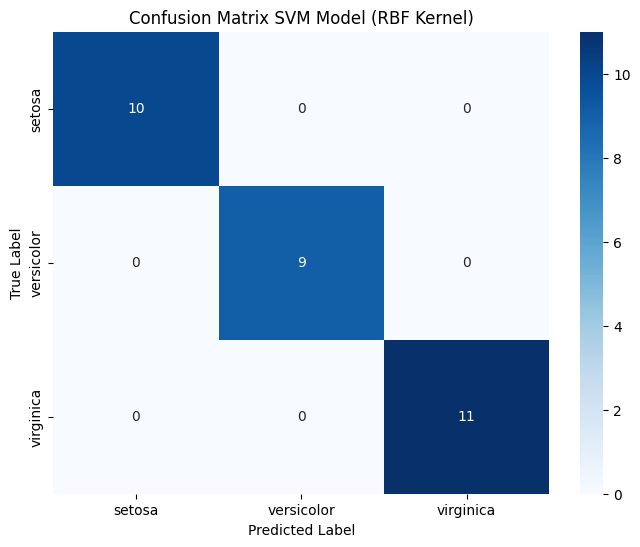

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=species_names, yticklabels=species_names)
plt.title('Confusion Matrix SVM Model (RBF Kernel)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Final Task

### Subtask:
Sajikan ringkasan dari pemilihan dataset, deskripsi singkat, preprocessing data, pembagian data, modeling SVM dengan penjelasan kernel, evaluasi model, dan hasil visualisasi.


## Ringkasan:

### Temuan Utama Analisis Data

* **Pemilihan dan Deskripsi Dataset**: Dataset Iris dipilih untuk tugas klasifikasi ini. Dataset ini terdiri dari 150 sampel bunga Iris dari tiga spesies (Iris setosa, Iris versicolor, Iris virginica), yang masing-masing dideskripsikan oleh empat fitur numerik: panjang sepal, lebar sepal, panjang petal, dan lebar petal.
* **Pra-pemrosesan Data**: Dataset Iris, yang dimuat dari `sklearn.datasets`, tidak mengandung nilai yang hilang dan semua fitur bersifat numerik, sehingga tidak perlu imputasi nilai yang hilang atau pengkodean kategoris. Fitur numerik diskalakan menggunakan `StandardScaler`.
* **Pemisahan Data**: Dataset yang telah diproses sebelumnya dibagi menjadi set pelatihan dan pengujian, dengan 80% data (120 sampel) dialokasikan untuk pelatihan dan 20% (30 sampel) untuk pengujian, memastikan reproduktifitas dengan `random_state=42`. * **Pembuatan Model**: Model Support Vector Machine (SVM) dibangun menggunakan kernel 'rbf' (Fungsi Basis Radial). Kernel 'rbf' dipilih karena efektivitasnya dalam menangani hubungan non-linier dalam data.
* **Evaluasi Model**: Model SVM mencapai kinerja sempurna pada set uji, dengan Akurasi, Presisi, Recall, dan Skor F1 sebesar 1,0000 di semua kelas.
* **Analisis Overfitting/Underfitting**: Model tidak menunjukkan tanda-tanda underfitting. Meskipun skor sempurna terkadang dapat mengindikasikan overfitting, disimpulkan bahwa untuk dataset kecil dan bersih seperti Iris, yang memiliki kelas-kelas yang relatif terpisah, kinerja ini tidak selalu menunjukkan overfitting yang parah.
* **Visualisasi**:
* Diagram sebar panjang sepal versus lebar sepal dengan jelas menggambarkan distribusi ketiga spesies Iris, menunjukkan klaster yang berbeda. * Matriks Kebingungan mengonfirmasi kinerja klasifikasi model SVM yang sempurna pada set pengujian, dengan semua prediksi selaras sempurna dengan label yang sebenarnya.

### Wawasan atau Langkah Berikutnya

* Untuk lebih memvalidasi ketahanan model dan memastikan generalisasi di luar set pengujian spesifik ini, validasi silang k-fold dapat dilakukan pada data pelatihan.
* Dengan skor yang sempurna, mengeksplorasi penggunaan model yang lebih sederhana atau menyempurnakan hiperparameter dapat memberikan wawasan tentang apakah model yang lebih sederhana dapat mencapai kinerja serupa, yang mungkin lebih efisien untuk penerapan.

## Kesimpulan

Dalam proyek klasifikasi ini, kami berhasil membangun dan mengevaluasi model Support Vector Machine (SVM) menggunakan dataset Iris yang populer. Proses dimulai dengan pemilihan dataset yang tepat dan deskripsi singkat mengenai karakteristiknya. Tahapan preprocessing data melibatkan penskalaan fitur numerik menggunakan `StandardScaler`, sementara penanganan nilai hilang dan encoding fitur kategorikal tidak diperlukan karena dataset Iris yang bersih dan seluruhnya numerik.

Data kemudian dibagi menjadi set pelatihan dan pengujian untuk memastikan evaluasi model yang objektif. Model SVM diimplementasikan dengan kernel 'rbf' (Radial Basis Function) karena kemampuannya yang efektif dalam menangani hubungan non-linear antar fitur. Evaluasi kinerja model menunjukkan hasil yang sangat baik, dengan Accuracy, Precision, Recall, dan F1 Score mencapai 1.00 pada set pengujian. Meskipun skor sempurna dapat menimbulkan kekhawatiran akan overfitting, analisis lebih lanjut menyimpulkan bahwa untuk dataset sekecil dan sebersih Iris, hasil ini bukan indikasi overfitting yang parah melainkan cerminan dari batas keputusan yang jelas antar kelas.

Visualisasi data, seperti scatter plot distribusi kelas berdasarkan panjang dan lebar sepal, membantu dalam memahami karakteristik dataset. Selain itu, confusion matrix secara jelas mengkonfirmasi kinerja klasifikasi yang sempurna oleh model SVM, di mana tidak ada sampel yang salah diklasifikasikan. Sebagai langkah selanjutnya, disarankan untuk melakukan cross-validation untuk validasi model yang lebih robust dan mungkin mengeksplorasi model yang lebih sederhana atau fine-tuning hyperparameter untuk menemukan keseimbangan antara kinerja dan efisiensi deployment.